In [1]:
import pickle

In [2]:
data = pickle.load(open('data.p','rb'))

EOFError: Ran out of input

In [3]:
import glob,os
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.core import Structure
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from ipypb import ipb as tqdm
from ase.io.vasp import read_vasp_out
from pyxtal.XRD import Similarity
from pyxtal import pyxtal
from pyxtal.XRD import Similarity,Profile
from pkg_resources import resource_filename

def XRD_comparison(structure,
                   experimental_data_file='../notebooks/experiment/TPA_FBC 204,49 Kelvin.xy',
                   wavelength=0.71073):
    xrd = XRDCalculator(wavelength=wavelength) # as per Marcus' data
    exp = pd.DataFrame(
    np.genfromtxt(
        experimental_data_file   
        )
        )
    exp.set_index(0,inplace=True)
    
    def similarity(struct,exp_profile):
        xtal1 = pyxtal(molecular=False)
        xtal1.from_seed(seed=struct)
        xrd = xtal1.get_XRD(thetas=[0, 12],wavelength=0.71073)
        p1 = xrd.get_profile()
        s = Similarity(p1,exp_profile,weight='cosine')
        return(s,xtal1)
    
    e = np.array(exp.reset_index())
    expprofile = Profile().get_profile(two_thetas=e[:,0],intensities=e[:,1],min2theta=2,max2theta=12)
    s,xtal = similarity(structure,expprofile)  
    return(s,xtal)


In [41]:
from pymatgen.core import Structure
import glob 

xrds = {}
for file in tqdm(glob.glob('./runs/run*')):
    print(file)
    struct = Structure.from_file(file)
    #s,xtal = XRD_comparison(structure=struct)
    xtal = pyxtal(molecular=False)
    xtal.from_seed(seed=struct)
    xrd = xtal.get_XRD(thetas=[0,20],wavelength=0.71073)

    name = str(file).split('./runs/')[1].split('.vasp')[0]
    xrds[name] = xrd

 [████████████████████████████████████████████████████████████] 4/4 [00:00<00:00, 0.02s/it]

./runs/run_0.vasp
./runs/run_1.vasp
./runs/run_2.vasp
./runs/run_3.vasp


(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'PXRD of C4H12Cl4FeN'}, xlabel='2$\\Theta$ ($\\lambda$=0.71073 $\\AA$)', ylabel='Intensity'>)

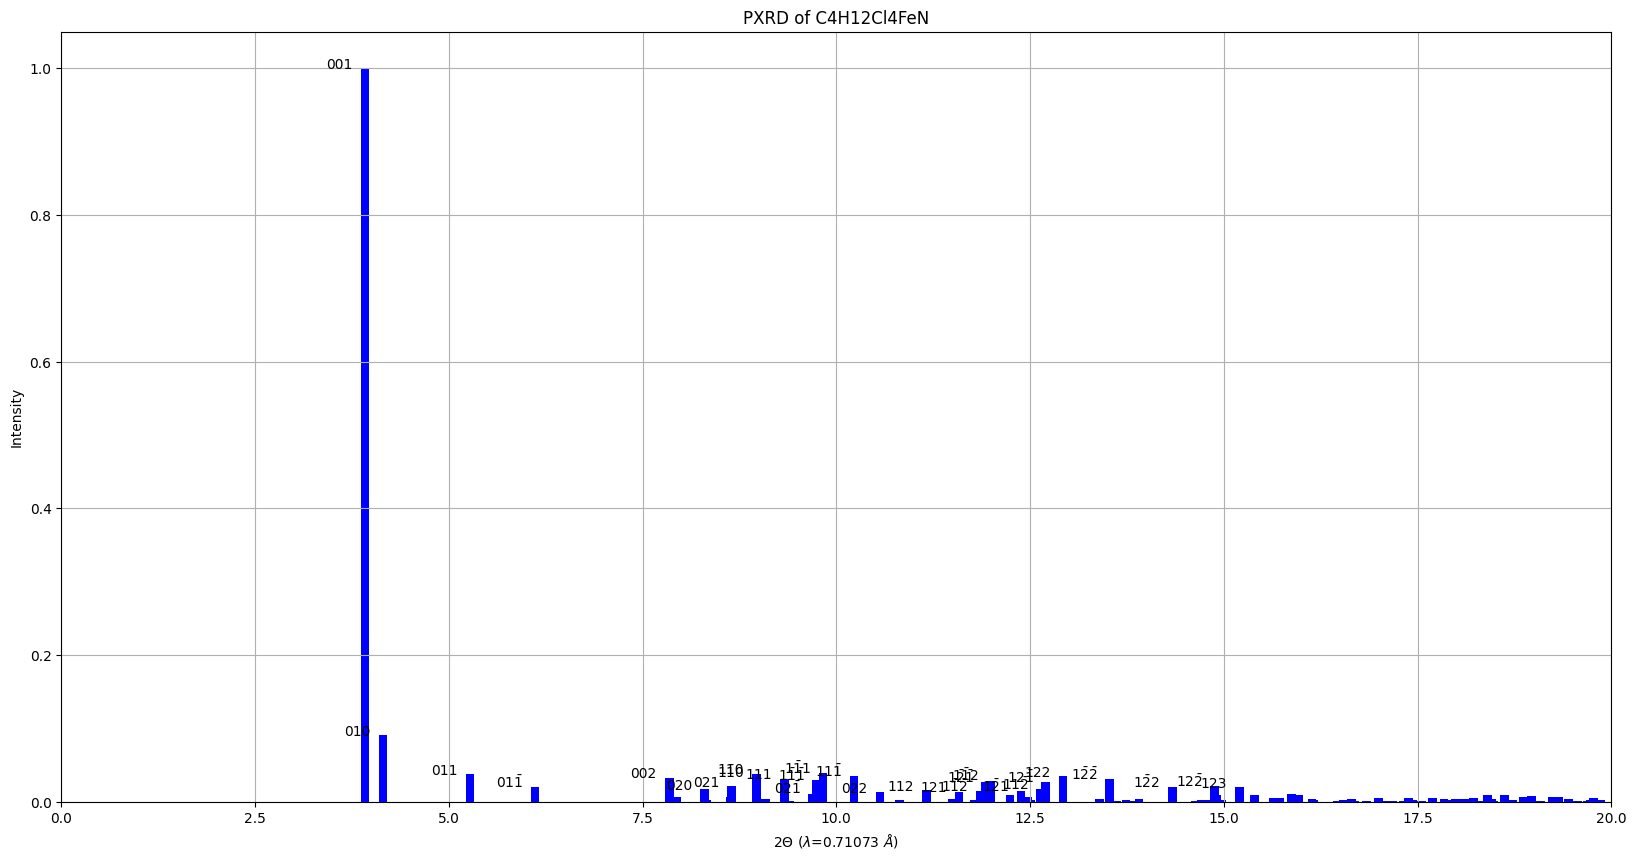

In [45]:
xrds['run_3'].plot_pxrd()

In [56]:
test = [[1,2,3,4,5,6],[1,2,3,4,5,6]]

for i,chunk in enumerate(test):
    for j,chunki in enumerate(chunk):
        print(i+j+len(chunk)*i)


0
1
2
3
4
5
7
8
9
10
11
12


In [13]:
df = pd.read_json('/Users/badw/Desktop/test.json')

In [15]:
df.reset_index(inplace=True)

In [19]:
df.T[0]['index']

18

In [ ]:
0+1,0+2,0+3,0+4,0+5, 1
1+5,

AttributeError: 'XRD' object has no attribute 'fx'

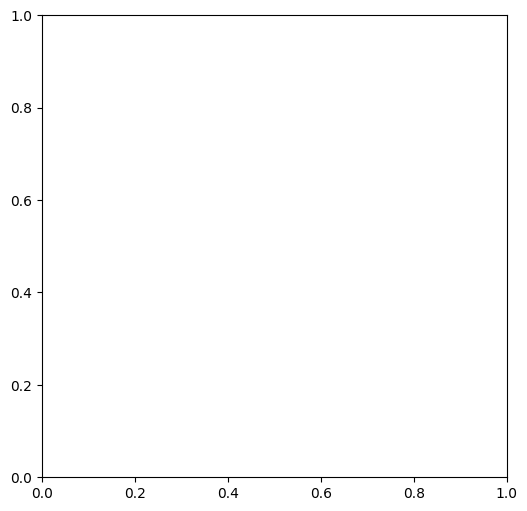

In [9]:
fig,ax = plt.subplots(figsize=(6,6))

i = 0
for k,v in xrds.items():
    ax.plot(v.fx,v.fy+i)
    ax.text(2,v.fy[0]+i,k,va='bottom')
    i+=2